In [1]:
import os
os.chdir(r'E:\The Scholars\Assessment\Python\Video Games Analysis')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
videogame_df = pd.read_csv('VideoGameSales.csv')

In [4]:
videogame_df.shape

(500, 11)

In [5]:
videogame_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          500 non-null    int64  
 1   Name          500 non-null    object 
 2   Platform      500 non-null    object 
 3   Year          496 non-null    float64
 4   Genre         500 non-null    object 
 5   Publisher     499 non-null    object 
 6   NA_Sales      500 non-null    float64
 7   EUR_Sales     500 non-null    float64
 8   JAP_Sales     500 non-null    float64
 9   IND_Sales     500 non-null    float64
 10  Global_Sales  500 non-null    float64
dtypes: float64(6), int64(1), object(4)
memory usage: 43.1+ KB


In [6]:
videogame_df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            4
Genre           0
Publisher       1
NA_Sales        0
EUR_Sales       0
JAP_Sales       0
IND_Sales       0
Global_Sales    0
dtype: int64

In [7]:
videogame_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EUR_Sales,JAP_Sales,IND_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
495,496,Sonic Mega Collection Plus,PS2,2004.0,Misc,Sega,1.54,1.14,0.00,0.22,2.90
496,497,Sega Superstars Tennis,X360,2008.0,Sports,Sega,1.75,0.86,0.00,0.28,2.90
497,498,World Soccer Winning Eleven 7 International,PS2,2003.0,Sports,Konami Digital Entertainment,0.08,1.24,1.13,0.45,2.90
498,499,Need for Speed: Most Wanted,PS3,2012.0,Racing,Electronic Arts,0.71,1.51,0.06,0.61,2.89


Q1. How many games have been sold between 2001 and 2010 in Millions of all countries and globally? 

In [23]:
print('''Calculating the country and global sales between year 2001 and 2010''')
year_count = [i for i in range(2001,2011)]
count_in_range = videogame_df.loc[videogame_df['Year'].isin(year_count)]
ns = sum(count_in_range.NA_Sales)
print('\nTotal Sales in the North America from 2001 to 2010 is: ', round(ns), 'Millions')

es = sum(count_in_range.EUR_Sales)
print('\nTotal Sales in the Europe from 2001 to 2010 is: ', round(es), 'Millions')

js = sum(count_in_range.JAP_Sales)
print('\nTotal Sales in the Japan from 2001 to 2010 is: ', round(js), 'Millions')

iis = sum(count_in_range.IND_Sales)
print('\nTotal Sales in the India from 2001 to 2010 is: ', round(iis), 'Millions')

gs = sum(count_in_range.Global_Sales)
print('\nTotal Sales in the Global Sales from 2001 to 2010 is: ', round(gs), 'Millions')

Calculating the country and global sales between year 2001 and 2010

Total Sales in the North America from 2001 to 2010 is:  784 Millions

Total Sales in the Europe from 2001 to 2010 is:  521 Millions

Total Sales in the Japan from 2001 to 2010 is:  192 Millions

Total Sales in the India from 2001 to 2010 is:  189 Millions

Total Sales in the Global Sales from 2001 to 2010 is:  1685 Millions


Q2. Create a dataframe for platforms and Publishers have been in the top in maximum counts, sort it also

In [26]:
top_platform = videogame_df.Platform.value_counts().head(15)
top_publisher = videogame_df.Publisher.value_counts().head(15)

In [28]:
pd.DataFrame(top_platform)

,Platform
PS2,82
X360,64
PS3,56
PS,45
Wii,40
DS,39
PS4,27
GB,17
3DS,17
NES,17


In [29]:
pd.DataFrame(top_publisher)

,Publisher
Nintendo,141
Electronic Arts,66
Sony Computer Entertainment,52
Activision,45
Ubisoft,28
Take-Two Interactive,24
Microsoft Game Studios,22
Capcom,13
Konami Digital Entertainment,11
Sega,11


Q3. How to aggregate the mean, minimum and Maximum of games based on Publisher for Global Sales

In [31]:
agg_result = videogame_df.groupby('Publisher').agg({'Global_Sales': ['mean','min','max']})
agg_result

Global_Sales             
                                               mean   min    max
Publisher                                                       
505 Games                                  4.762500  2.91   6.81
Acclaim Entertainment                      3.360000  3.36   3.36
Activision                                 6.776667  3.05  14.76
Atari                                      4.151429  2.94   7.81
Bethesda Softworks                         5.172222  3.17   8.84
Capcom                                     4.076154  2.95   6.30
Disney Interactive Studios                 3.100000  3.04   3.16
Eidos Interactive                          4.042222  2.96   5.24
Electronic Arts                            4.413636  2.89   8.49
Enix Corporation                           3.662500  3.12   4.47
Fox Interactive                            3.560000  3.56   3.56
GT Interactive                             6.270000  6.27   6.27
Hasbro Interactive                         4.160000  4.16   4.16
Konami Digital Entertainment               4.321818  2.90   6.05
LucasArts                                  4.250000  3.32   5.83
MTV Games                                  3.190000  3.19   3.19
Microsoft Game Studios                     6.888182  2.93  21.82
Namco Bandai Games                         3.770000  3.08   4.24
Nintendo                                   9.313972  2.91  82.74
Palcom                                     4.170000  4.17   4.17
RedOctane                                  5.120000  5.12   5.12
Sega                                       4.305455  2.90   8.06
Sony Computer Entertainment                5.297885  2.89  14.98
Sony Computer Entertainment Europe         4.393333  3.17   5.99
Square Enix                                4.808000  3.19   5.95
SquareSoft                                 5.526667  3.42   7.86
THQ                                        3.232857  2.94   3.58
Take-Two Interactive                       7.968333  3.00  21.40
Ubisoft                                    4.729286  3.02  10.26
Universal Interactive                      5.420000  5.42   5.42
Virgin Interactive                         4.562500  3.61   5.82
Vivendi Games                              4.410000  4.12   4.70
Warner Bros. Interactive Entertainment     3.824286  2.99   5.53

Q4. Assume that we want to join the gaming industry and want to target the US market. Which genre should we try to make

In [33]:
videogame_df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [35]:
top_1000_us = videogame_df.sort_values('NA_Sales', ascending=False).head(1000)
top_1000_us

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EUR_Sales,JAP_Sales,IND_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
...,...,...,...,...,...,...,...,...,...,...,...
214,215,Monster Hunter Freedom 3,PSP,2010.0,Role-Playing,Capcom,0.00,0.00,4.87,0.00,4.87
383,384,Monster Hunter 4,3DS,2013.0,Role-Playing,Capcom,0.00,0.00,3.44,0.00,3.44
426,427,Dragon Quest VI: Maboroshi no Daichi,SNES,1995.0,Role-Playing,Enix Corporation,0.00,0.00,3.19,0.00,3.19
338,339,Friend Collection,DS,2009.0,Misc,Nintendo,0.00,0.00,3.67,0.00,3.67


In [36]:
top_1000_us_genre = top_1000_us.Genre.value_counts()

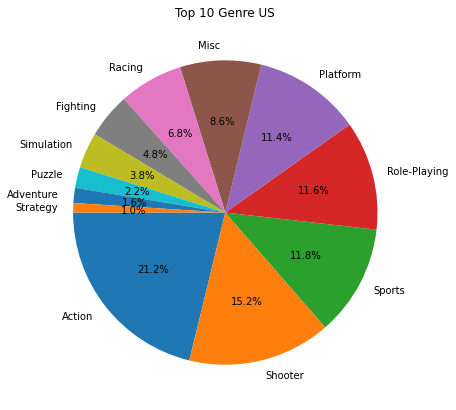

In [42]:
plt.figure(figsize=(7,7))
plt.title('Top 10 Genre US')
plt.pie(top_1000_us_genre, labels=top_1000_us_genre.index, autopct ='%1.1f%%', startangle=180)
plt.show()

Q5. Who is the top publisher in Japan

In [45]:
top_publisher = videogame_df.groupby('Publisher').sum()
top_publisher_jp = top_publisher.sort_values('JAP_Sales', ascending = False)

In [46]:
top_publisher_jp

,Rank,Year,NA_Sales,EUR_Sales,JAP_Sales,IND_Sales,Global_Sales
Publisher,,,,,,,
Nintendo,27646,282324.0,617.90,336.67,281.45,77.32,1313.27
Sony Computer Entertainment,13375,104219.0,120.18,89.57,29.51,36.21,275.49
Capcom,4193,26084.0,16.84,8.90,24.10,3.15,52.99
Enix Corporation,1430,7973.0,0.38,0.14,14.09,0.03,14.65
Square Enix,1180,10031.0,7.82,3.17,9.99,3.07,24.04
Konami Digital Entertainment,3277,22053.0,11.43,15.97,9.79,10.33,47.54
SquareSoft,652,5993.0,4.76,2.49,8.96,0.39,16.58
Electronic Arts,20132,128516.0,114.19,130.10,5.85,41.18,291.30
Take-Two Interactive,5102,48190.0,92.45,61.21,4.34,33.28,191.24


Q6. How the racing games are performing over the period of time? 

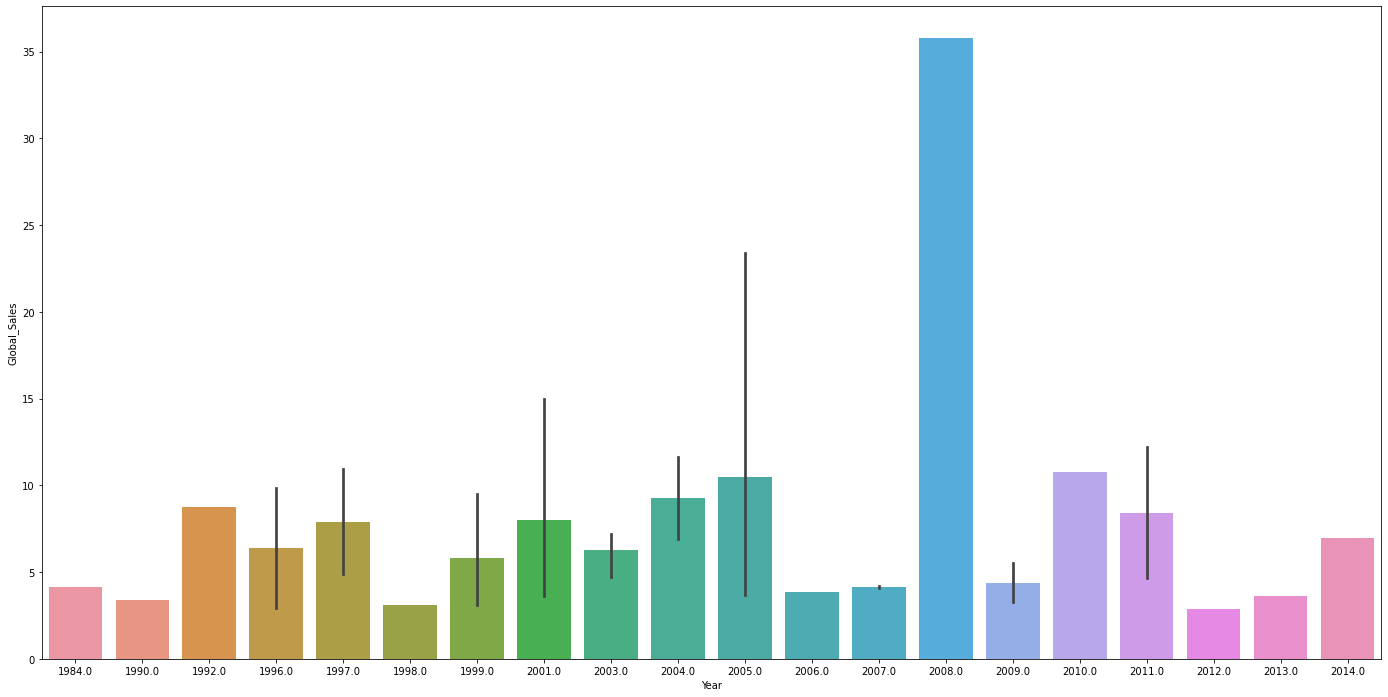

In [52]:
plt.figure(figsize=(24,12))
racing_game_list = videogame_df.loc[videogame_df['Genre']=='Racing']
sns.barplot(data=racing_game_list, x='Year', y='Global_Sales')

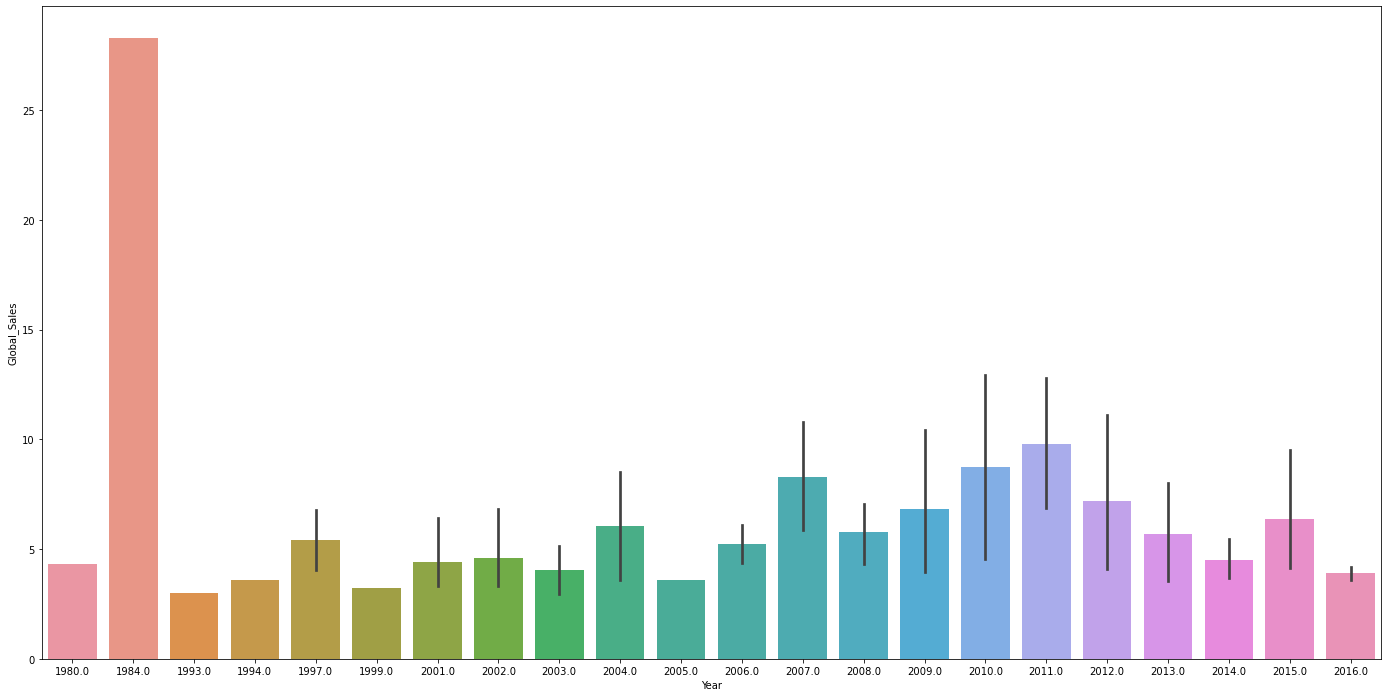

In [51]:
plt.figure(figsize=(24,12))
shooter_game_list = videogame_df.loc[videogame_df['Genre']=='Shooter']
sns.barplot(data=shooter_game_list, x='Year', y='Global_Sales')